# Crear características

Una vez que se hayan identificado un conjunto de características con algo de potencial, es hora de comenzar a desarrollarlas.

Usaremos cuatro conjuntos de datos que tiene una variedad de tipos de características: Accidentes de tráfico de EE. UU., automóviles 1985 , Formulaciones de concreto, y *valor de vida útil de clientes.

In [10]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [ ]:

plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


accidents = pd.read_csv("../../data/fe/accidents.csv.zip")
autos = pd.read_csv("../../data/fe/autos.csv")
concrete = pd.read_csv("../../data/fe/concrete.csv")
customer = pd.read_csv("../../data/fe/customer.csv.zip")

## Tips para descubrir nuevas características
- **Comprender las características**: Consulta la documentación de datos de tu conjunto de datos, si está disponible.
- **Investigar el dominio del problema**: Si tu problema es predecir los precios de la vivienda, investigue un poco de bienes raíces, por ejemplo.Wikipedia puede ser un buen punto de partida, pero los libros y <a href = "https://scholar.google.com/"> artículos de revista </a> a menudo tendrán la mejor información.
- **Estudiar trabajos anteriores**.
- **Usar la visualización de datos**: La visualización puede revelar patologías en la distribución de una característica o relaciones complicadas que podrían simplificarse.Asegúrese de visualizar su conjunto de datos mientras trabaja a través del proceso de ingeniería de funciones.

## Transformaciones matemáticas

Las relaciones entre las características numéricas a menudo se expresan a través de fórmulas matemáticas, que con frecuencia encontraremos como parte de su investigación de dominio. 

- En el conjunto de datos *Automóvil* se encuentran características que describen el motor de un automóvil.
- La investigación produce una variedad de fórmulas para crear nuevas características potencialmente útiles.
- La "relación de carrera", por ejemplo, es una medida de cuán eficiente es un motor en lugar de cómo funciona:

In [12]:
autos["stroke_ratio"] = autos.stroke / autos.bore

autos[["stroke", "bore", "stroke_ratio"]].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


Cuanto más complicada sea una combinación, más difícil será para un modelo aprender, como esta fórmula para el "desplazamiento" de un motor, una medida de su potencia:

In [22]:
autos["displacement"] = (
    np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.num_of_cylinders
)

La visualización de datos puede sugerir transformaciones, a menudo una "remodelación" de una característica a través de potencias o logaritmos.

La distribución de `Windspeed` en *Accidentes de tráfico* es muy sesgada, por ejemplo.

En este caso, el logaritmo es un método efectivo para normalizarlo:

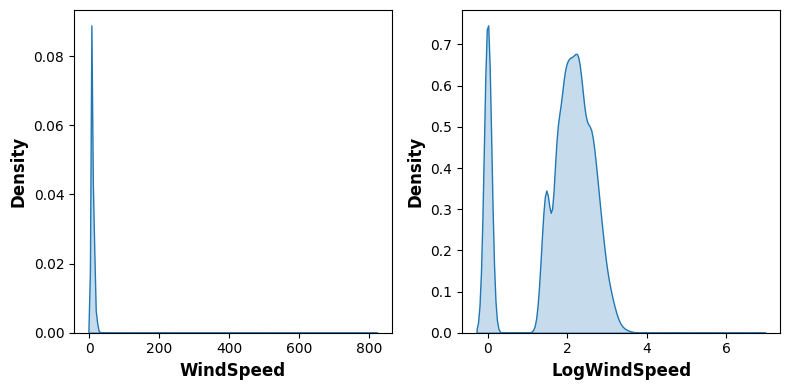

In [23]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents["LogWindSpeed"] = accidents.WindSpeed.apply(np.log1p)

# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);

## Conteo

Las características que describen la presencia o ausencia de algo a menudo vienen en conjuntos, por ejemplo, el conjunto de factores de riesgo para una enfermedad.

Se puede agregar tales características creando un conteo.

Estas características serán *binarias* (`1` para presente,` 0` para ausente) o *boleanas* .

En Python, los booleanos se pueden sumar como si fueran enteros.

En *Accidentes de tráfico* hay varias características que indican si algún objeto de carretera estaba cerca del accidente.

Podemos crear un recuento del número total de características de la carretera cercanas utilizando el método 'Sum`:

In [15]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

accidents[roadway_features + ["RoadwayFeatures"]].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


Popdemos usar los métodos de DataFrame para *crear* valores booleanos.

En el conjunto de datos de *concreto* se encuentran las cantidades de componentes en una formulación concreta.

Muchas formulaciones carecen de uno o más componentes (es decir, el componente tiene un valor de 0).

Podemos contar cuántos componentes hay en una formulación:

In [16]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

concrete[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


# Construyendo y Rompiendo Características

A menudo tendremos cadenas complejas que se pueden dividir útilmente en piezas más simples.Algunos ejemplos comunes:
- ID numbers: `'123-45-6789'`
- Phone numbers: `'(999) 555-0123'`
- Street addresses: `'8241 Street Ln., Goose City, NV'`
- Internet addresses: `'http://www.google.com`
- Product codes: `'0 36000 29145 2'`
- Dates and times: `'Mon Sep 30 07:06:05 2013'`

Características como estas a menudo tendrán algún tipo de estructura que puede usar.

Los números de teléfono, por ejemplo, tienen un código de área (el `'(999)'`) que le indica la ubicación de la persona que llama.

El accesor `str` le permite aplicar métodos de cadena como dividir  directamente a las columnas.

El DataSet *Valor de por vida del cliente * contiene características que describen a los clientes de una compañía de seguros.

De la variable 'Política', podríamos separar el 'tipo' del 'nivel' de la cobertura:

In [24]:
customer[["Type", "Level"]] = (  # Create two new features
    customer["Policy"]           # from the Policy feature
    .str                         # through the string accessor
    .split(" ", expand=True)     # by splitting on " "
                                 # and expanding the result into separate columns
)

customer[["Policy", "Type", "Level"]].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


También pueden unirse características simples en una característica compuesta si tenemos motivos para creer que hay alguna interacción en la combinación:

In [25]:
autos["make_and_style"] = autos["make"] + "_" + autos["body_style"]
autos[["make", "body_style", "make_and_style"]].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


# Transformación de grupo 

Finalmente tenemos **Transformaciones de grupo**, que agregan información en múltiples filas agrupadas por alguna categoría.

Con una transformación grupal, pueden crearse características como: "El ingreso promedio del estado de residencia de una persona" o "La proporción de películas lanzadas en un día laborable, por género".

**Si se descubre una interacción de categoría, una transformación de grupo en esa categoría podría ser algo bueno a investigar.**

Utilizando una función de agregación, una transformación de grupo combina dos características: una característica categórica que proporciona la agrupación y otra característica cuyos valores se desea agregar.

Para el "ingreso promedio por estado", se puede elegir 'estado' para la función de agrupación, 'media' para la función de agregación e 'ingresos' para la función agregada:

In [26]:
customer["AverageIncome"] = (
    customer.groupby("State")  # for each state
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)

customer[["State", "Income", "AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


La función `mean` es un método de marcado, por lo que podemos pasarlo como una cadena a `transform '.

Otros métodos prácticos incluyen `max`,` min`, `median`,` var`, `std` y` count`.

Así es como podríamos calcular la frecuencia de un estado en el conjunto de datos:

In [27]:
customer["StateFreq"] = (
    customer.groupby("State")
    ["State"]
    .transform("count")
    / customer.State.count()
)

customer[["State", "StateFreq"]].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


Se puede usar una transformación como esta para crear una "codificación de frecuencia" para una característica categórica.

Si se están utilizando conjuntos de entrenamiento y validación, para preservar su independencia, es mejor crear una característica agrupada utilizando solo el conjunto de entrenamiento y luego unirla al conjunto de validación. 

Podemos usar el método 'merge' del conjunto de validación después de crear un conjunto único de valores con `drop_dupplicates` en el conjunto de entrenamiento:

In [ ]:
# Creamos las divisiones
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

# Creamos el monto promedio de la reclamación por tipo de cobertura, en el conjunto de entrenamiento
df_train["AverageClaim"] = df_train.groupby("Coverage")["ClaimAmount"].transform("mean")

# Mezclamos los valores en el conjunto de validación
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

df_valid[["Coverage", "AverageClaim"]].head(10)

,Coverage,AverageClaim
0,Premium,662.325334
1,Basic,378.834168
2,Basic,378.834168
3,Extended,480.842546
4,Premium,662.325334
5,Basic,378.834168
6,Basic,378.834168
7,Premium,662.325334
8,Basic,378.834168
9,Basic,378.834168


## <strong> Consejos para crear características </strong> <br>
Tener en cuenta las propias fortalezas y debilidades de su modelo al crear características.

Algunas pautas son:
- Los **modelos lineales** aprenden **sumas y restas** naturalmente, pero no pueden aprender nada más complejo.
- Las **proporciones parecen ser difíciles de aprender** para la mayoría de los modelos. 
    - Las **combinaciones de relación** a menudo conducen a algunas ganancias de rendimiento fáciles.
- Los **modelos lineales y las redes neuronales** generalmente funcionan mejor con **características normalizadas**. 
    - Las **redes neuronales** especialmente necesitan **características escaladas** a valores no muy lejos de 0. 
    - Los modelos basados ​​en **árboles** (como bosques aleatorios y xgboost) a veces pueden beneficiarse de la **normalización**, pero en general no.
- Los modelos de **árboles** pueden aprender a aproximar casi cualquier combinación de características, pero cuando una **combinación** es especialmente importante, aún se puede obtener beneficios al crearla explícitamente, especialmente cuando los datos son limitados.
- Los **recuentos son especialmente útiles para los modelos de árboles**, ya que estos modelos no tienen una forma natural de agregar información en muchas características a la vez.
